## Loading the data and other imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
from scipy.stats import chi2_contingency

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('dataset___4.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total Score,Age,Partner Support,Marital Status,Currently Working,Sleep Quality,Fertility Treatment History,Diabetes Level,Stress Category
0,Definitely not so much now,Rather less than I used to,"No, never","Yes, very often","Yes, quite a lot","Yes, most of the time I haven't been able to c...","Yes, sometimes","No, not at all","No, never","Yes, quite often",17,26,Normal,Married,No,Moderate Quality,Moderate Intervention,Gestational Diabetes,Moderate Possibility of Stress
1,Definitely not so much now,Rather less than I used to,Not very often,"No, not at all","No, not much","Yes, sometimes I haven't been coping as well a...","Yes, sometimes","No, not at all","No, never",Never,9,35,Good,Married,Yes,High Quality,No Treatment Required,No Diabetes,No Stress
2,Not at all,Rather less than I used to,Not very often,"Yes, sometimes","No, not at all","No, most of the time I have coped quite well","Yes, most of the time","No, not at all","Yes, most of the time",Hardly ever,15,28,Normal,Married,No,Moderate Quality,Moderate Intervention,No Diabetes,Low Possibility of Stress
3,Definitely not so much now,Rather less than I used to,"Yes, some of the time","No, not at all","Yes, sometimes","Yes, most of the time I haven't been able to c...",Not very often,"Yes, most of the time",Only occasionally,Sometimes,17,25,Normal,Married,No,Moderate Quality,Moderate Intervention,Type 2 Diabetes,Moderate Possibility of Stress
4,Not at all,Definitely less than I used to,"Yes, most of the time","Yes, very often","No, not much","No, most of the time I have coped quite well",Not very often,"Yes, most of the time",Only occasionally,"Yes, quite often",21,20,Not Enough,Married,No,Poor Quality,Moderate Intervention,Type 1 Diabetes,High Possibility of Stress


In [66]:
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'Total Score', 'Age', 'Partner Support', 'Marital Status',
       'Sleep Quality', 'Fertility Treatment History', 'Diabetes Level',
       'Stress Category'],
      dtype='object')

In [67]:
df["Partner Support"].unique()

array(['Normal', 'Good', 'Not Enough'], dtype=object)

In [68]:
df["Marital Status"].unique()

array(['Married', 'Single', 'Widowed', 'Divorced'], dtype=object)

In [69]:
df["Sleep Quality"].unique()

array(['Moderate Quality', 'High Quality', 'Poor Quality'], dtype=object)

In [70]:
df["Fertility Treatment History"].unique()

array(['Moderate Intervention', 'No Treatment Required',
       'Minimal Intervention', 'Advanced Treatment'], dtype=object)

In [71]:
df["Diabetes Level"].unique()

array(['Gestational Diabetes', 'No Diabetes', 'Type 2 Diabetes',
       'Type 1 Diabetes'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   q1                           800 non-null    object
 1   q2                           800 non-null    object
 2   q3                           800 non-null    object
 3   q4                           800 non-null    object
 4   q5                           800 non-null    object
 5   q6                           800 non-null    object
 6   q7                           800 non-null    object
 7   q8                           800 non-null    object
 8   q9                           800 non-null    object
 9   q10                          800 non-null    object
 10  Total Score                  800 non-null    int64 
 11  Age                          800 non-null    int64 
 12  Partner Support              800 non-null    object
 13  Marital Status               800 no

In [6]:
df.describe()

,Total Score,Age
count,800.000000,800.000000
mean,14.927500,27.330000
std,4.944219,5.010737
min,5.000000,18.000000
25%,9.750000,24.000000
50%,15.500000,28.000000
75%,19.250000,32.000000
max,25.000000,35.000000


([0, 1, 2, 3],
 [Text(0, 0, 'Moderate Possibility of Stress'),
  Text(1, 0, 'No Stress'),
  Text(2, 0, 'Low Possibility of Stress'),
  Text(3, 0, 'High Possibility of Stress')])

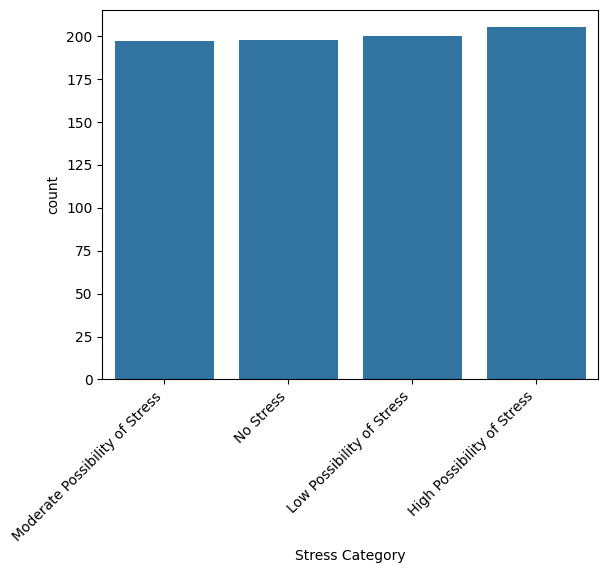

In [7]:
sns.countplot(x='Stress Category',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'Moderate Possibility of Stress'),
  Text(1, 0, 'No Stress'),
  Text(2, 0, 'Low Possibility of Stress'),
  Text(3, 0, 'High Possibility of Stress')])

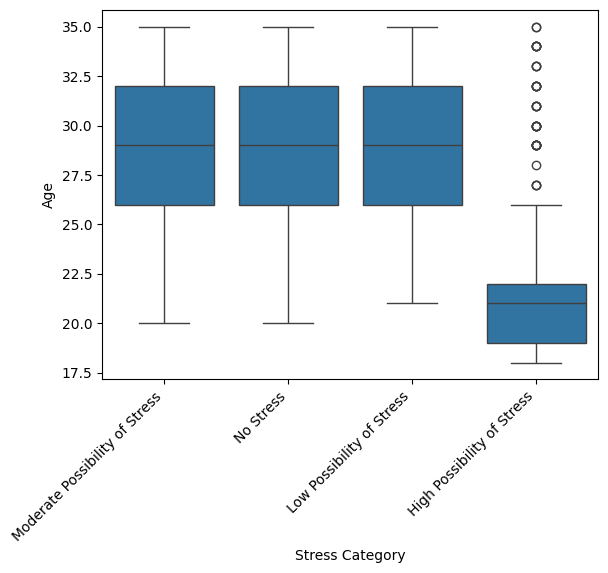

In [8]:
sns.boxplot(x='Stress Category',y='Age',data=df)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'Moderate Possibility of Stress'),
  Text(1, 0, 'No Stress'),
  Text(2, 0, 'Low Possibility of Stress'),
  Text(3, 0, 'High Possibility of Stress')])

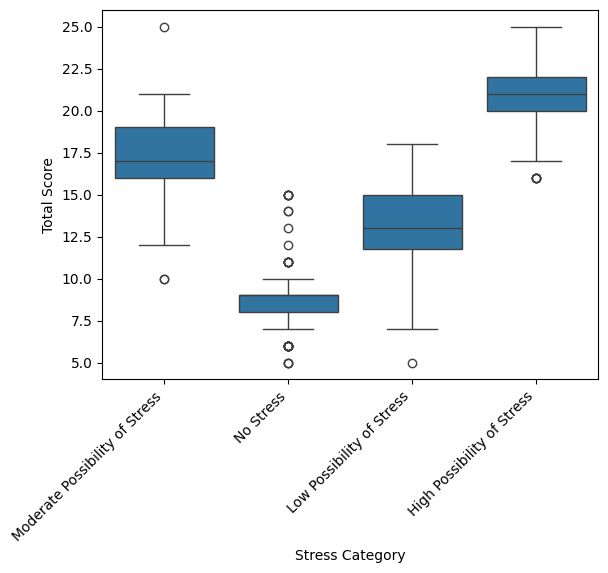

In [9]:
sns.boxplot(x='Stress Category',y='Total Score',data=df)
plt.xticks(rotation=45, ha='right')

#### removing outliers 

In [10]:
# def remove_outliers(group):
#     Q1 = group['Total Score'].quantile(0.25)
#     Q3 = group['Total Score'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR 
#     
#     return group[(group['Total Score'] >= lower_bound) & (group['Total Score'] <= upper_bound)]




In [11]:
# df = df.groupby('Stress Category').apply(remove_outliers).reset_index(drop=True)

In [12]:
# sns.boxplot(x='Stress Category',y='Total Score',data=df)
# plt.xticks(rotation=45, ha='right')

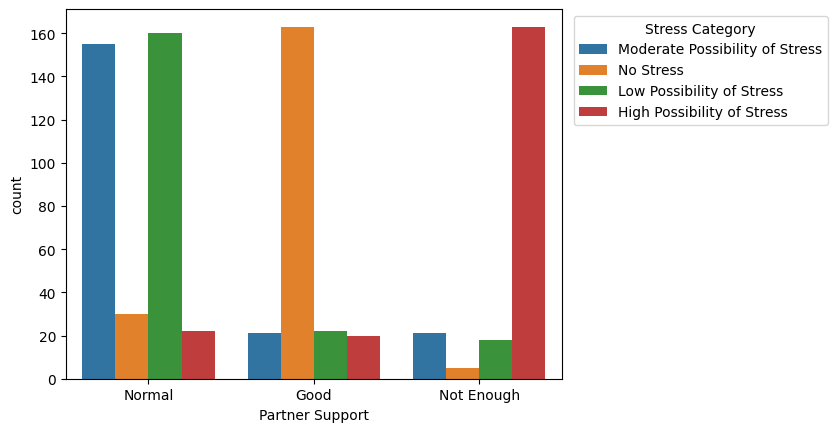

In [13]:
sns.countplot(x='Partner Support',data=df,hue='Stress Category')
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

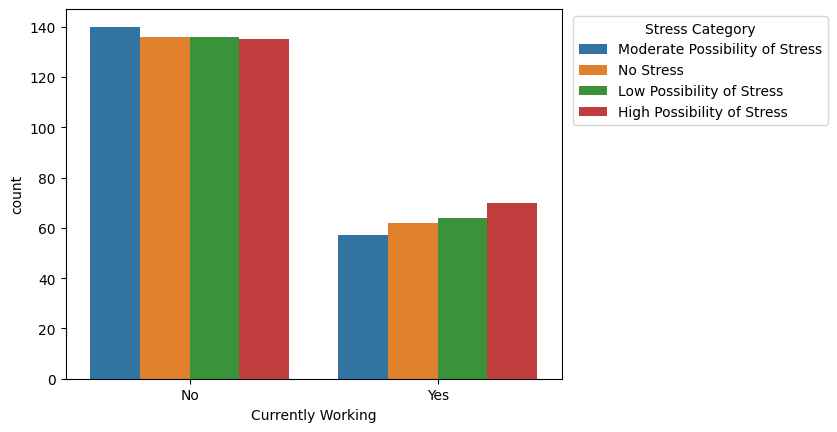

In [14]:
sns.countplot(x='Currently Working',data=df,hue='Stress Category')
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

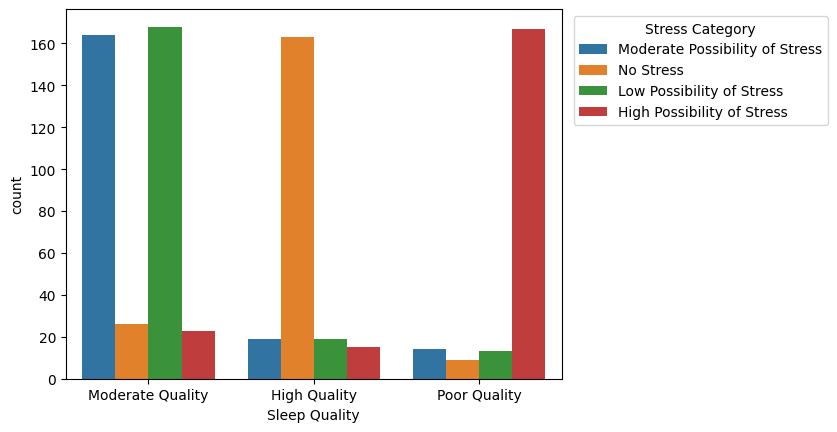

In [15]:
sns.countplot(x='Sleep Quality',data=df,hue='Stress Category', )
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)


([0, 1, 2, 3],
 [Text(0, 0, 'Moderate Intervention'),
  Text(1, 0, 'No Treatment Required'),
  Text(2, 0, 'Minimal Intervention'),
  Text(3, 0, 'Advanced Treatment')])

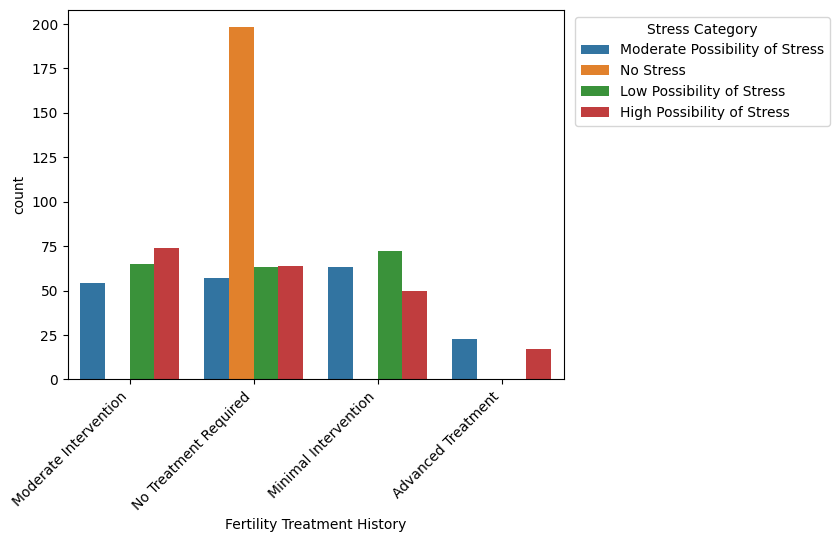

In [16]:
sns.countplot(x='Fertility Treatment History',data=df,hue='Stress Category', )
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

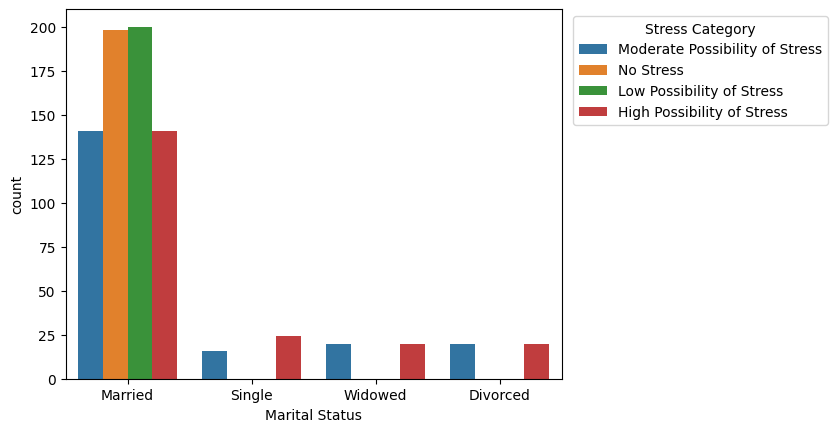

In [17]:
sns.countplot(x='Marital Status',data=df,hue='Stress Category', )
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)

([0, 1, 2, 3],
 [Text(0, 0, 'Gestational Diabetes'),
  Text(1, 0, 'No Diabetes'),
  Text(2, 0, 'Type 2 Diabetes'),
  Text(3, 0, 'Type 1 Diabetes')])

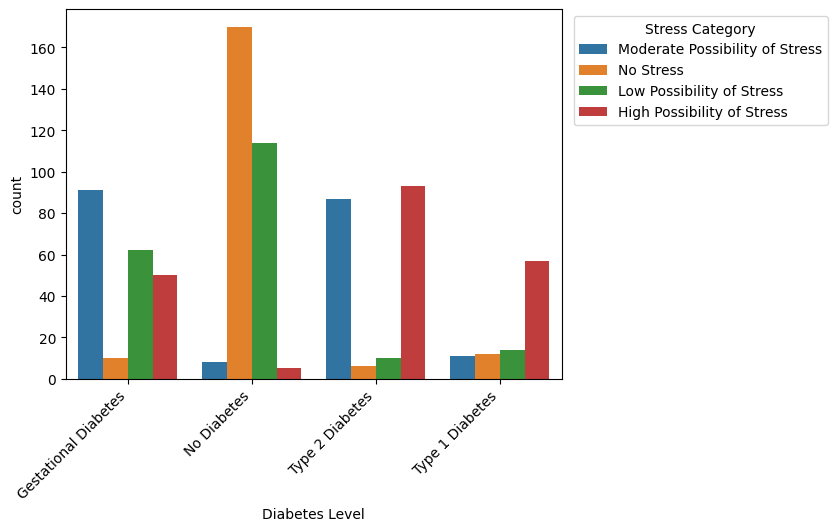

In [18]:
sns.countplot(x='Diabetes Level',data=df,hue='Stress Category', )
plt.legend(title='Stress Category', loc='upper right', bbox_to_anchor=(1.55, 1.), ncol=1)
plt.xticks(rotation=45, ha='right')

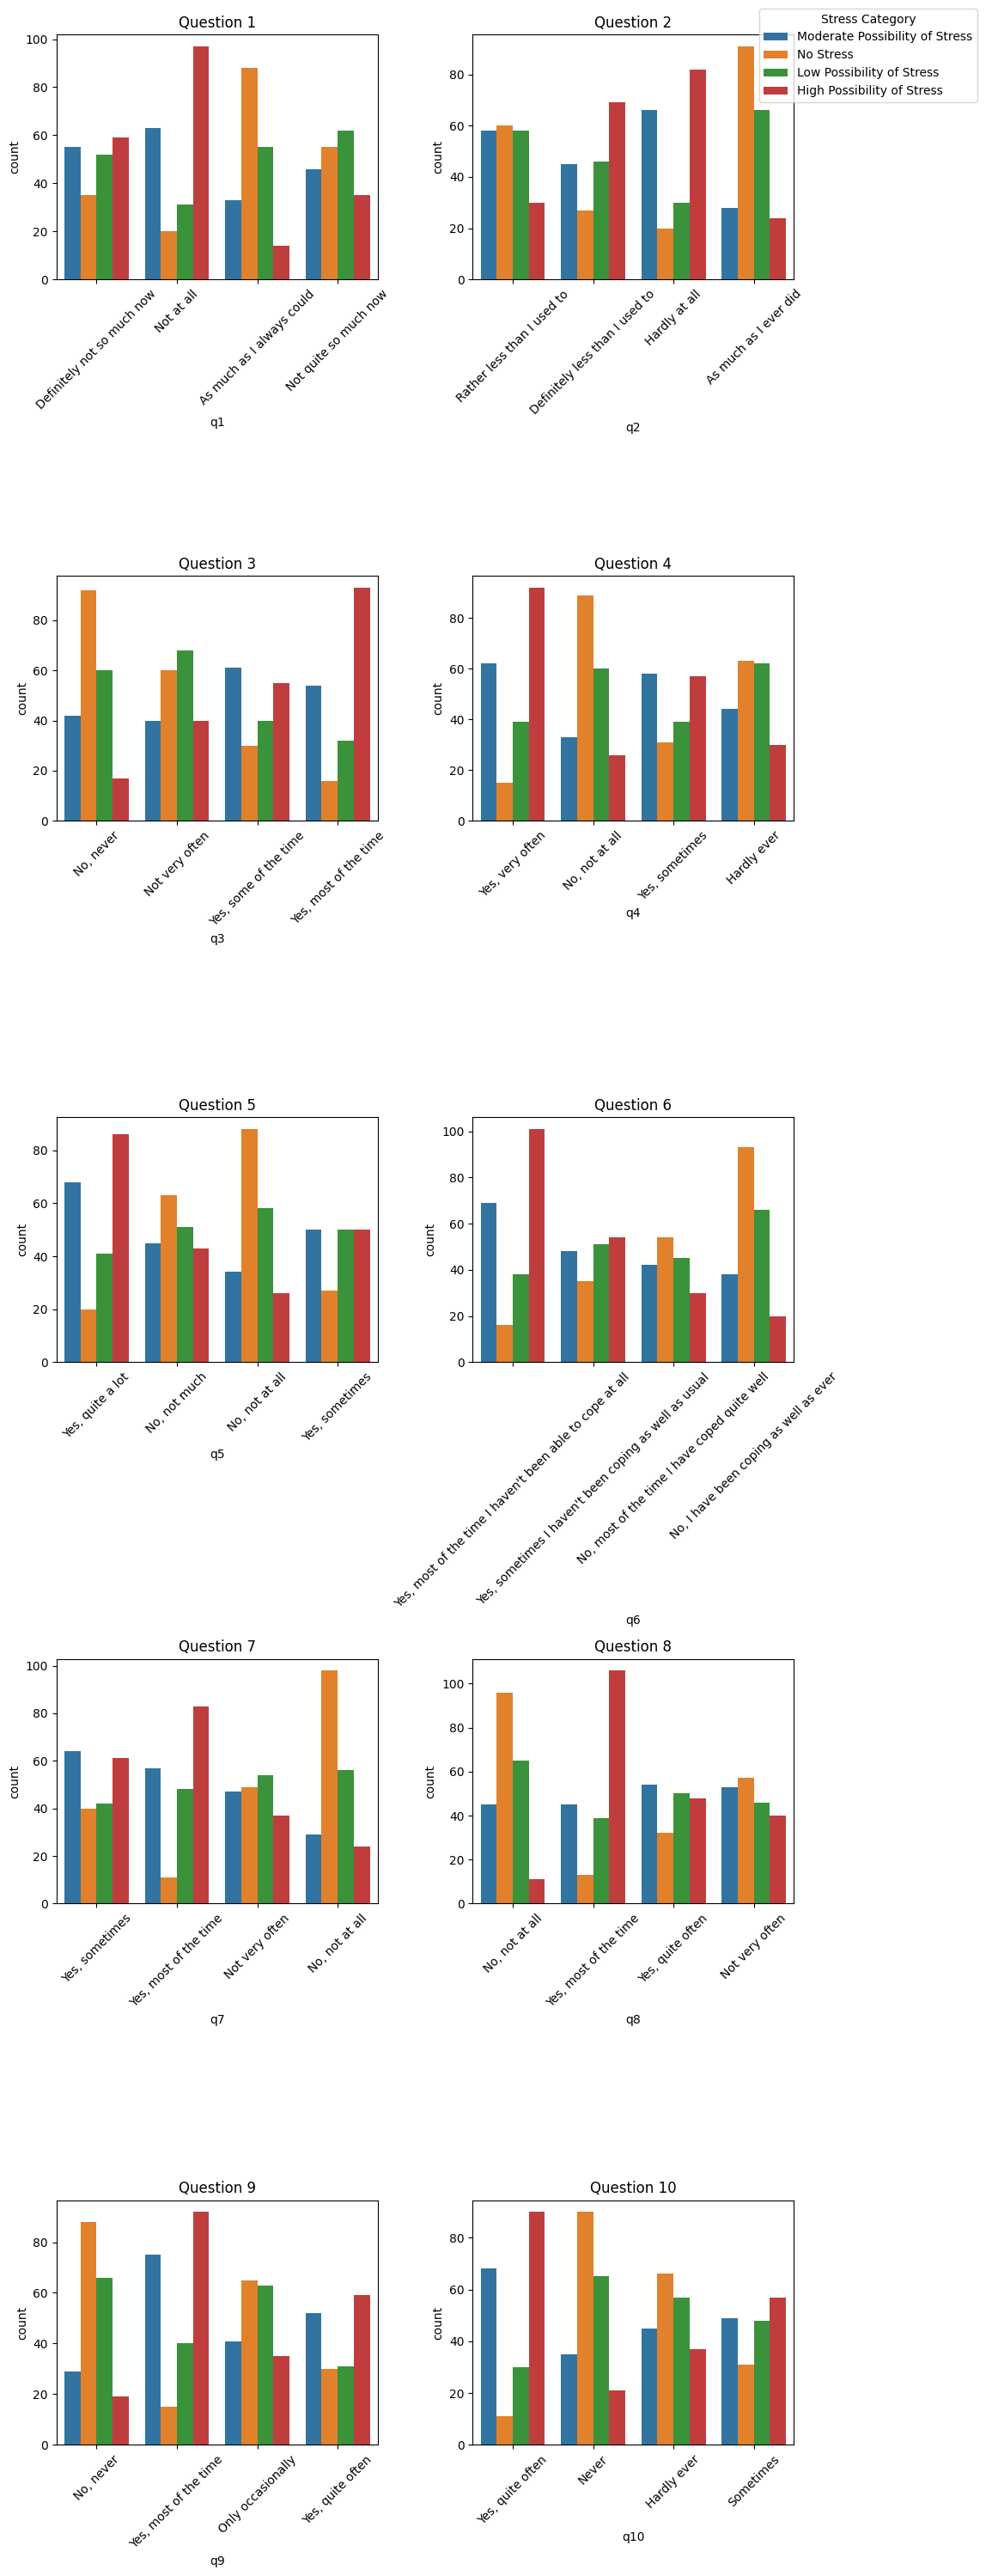

In [19]:
questions = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 30))
axes = axes.flatten()

for i, question in enumerate(questions):
    sns.countplot(x=question, data=df, hue='Stress Category', ax=axes[i])
    axes[i].set_title(f'Question {i+1}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Stress Category', loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)

plt.tight_layout()


### analyze the association between each independent variable and the Stress Category

#### categorical features and Stress Category

In [20]:
categorical_features =list(df.select_dtypes(['object']).columns)[:-1]
categorical_features

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'Partner Support',
 'Marital Status',
 'Currently Working',
 'Sleep Quality',
 'Fertility Treatment History',
 'Diabetes Level']

In [21]:
def cramers_v_and_p(matrix):
    chi2, p, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    r, k = matrix.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    return cramers_v, p

In [22]:
results = []

for features in categorical_features:

    matrix = pd.crosstab(df[features], df['Stress Category'])
    
    cv, p_value = cramers_v_and_p(matrix)
    results.append((features, cv, p_value))

In [23]:
results_df = pd.DataFrame(results, columns=['categorical features', 'Cramér\'s V', 'p-value'])

In [24]:
results_df['Significant'] = results_df['p-value'] < 0.05

In [25]:
results_df

,categorical features,Cramér's V,p-value,Significant
0,q1,0.246653,5.907301e-27,True
1,q2,0.242636,5.578048e-26,True
2,q3,0.248761,1.788896e-27,True
3,q4,0.237846,7.695368e-25,True
4,q5,0.210272,9.069365e-19,True
5,q6,0.242080,7.584441e-26,True
6,q7,0.234693,4.195558e-24,True
7,q8,0.265880,7.258372e-32,True
8,q9,0.253598,1.106769e-28,True
9,q10,0.248454,2.130408e-27,True


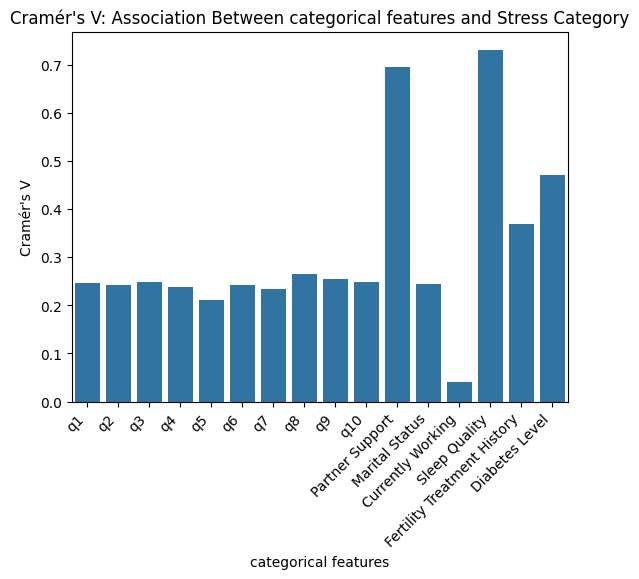

In [26]:
sns.barplot(x='categorical features', y='Cramér\'s V', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.title('Cramér\'s V: Association Between categorical features and Stress Category')
plt.ylabel('Cramér\'s V')
plt.show()

#### Numerical features and Stress Category

In [27]:
le = LabelEncoder()
df['Stress Category Encoded'] = le.fit_transform(df['Stress Category'])

In [28]:
corr_for_numerical = df.drop(categorical_features + ["Stress Category"], axis=1).corr()
corr_for_numerical

,Total Score,Age,Stress Category Encoded
Total Score,1.000000,-0.413793,-0.731190
Age,-0.413793,1.000000,0.463041
Stress Category Encoded,-0.731190,0.463041,1.000000


In [29]:
corr_for_numerical["Stress Category Encoded"]

Total Score               -0.731190
Age                        0.463041
Stress Category Encoded    1.000000
Name: Stress Category Encoded, dtype: float64

<Axes: ylabel='Stress Category Encoded'>

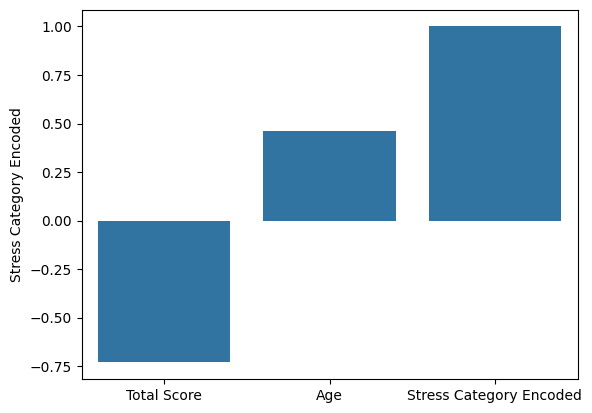

In [30]:
sns.barplot( data=corr_for_numerical["Stress Category Encoded"] )

In [31]:
df.drop("Stress Category Encoded", axis=1, inplace=True)

## Data PreProcessing

In [32]:
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total Score,Age,Partner Support,Marital Status,Currently Working,Sleep Quality,Fertility Treatment History,Diabetes Level,Stress Category
0,Definitely not so much now,Rather less than I used to,"No, never","Yes, very often","Yes, quite a lot","Yes, most of the time I haven't been able to c...","Yes, sometimes","No, not at all","No, never","Yes, quite often",17,26,Normal,Married,No,Moderate Quality,Moderate Intervention,Gestational Diabetes,Moderate Possibility of Stress
1,Definitely not so much now,Rather less than I used to,Not very often,"No, not at all","No, not much","Yes, sometimes I haven't been coping as well a...","Yes, sometimes","No, not at all","No, never",Never,9,35,Good,Married,Yes,High Quality,No Treatment Required,No Diabetes,No Stress
2,Not at all,Rather less than I used to,Not very often,"Yes, sometimes","No, not at all","No, most of the time I have coped quite well","Yes, most of the time","No, not at all","Yes, most of the time",Hardly ever,15,28,Normal,Married,No,Moderate Quality,Moderate Intervention,No Diabetes,Low Possibility of Stress
3,Definitely not so much now,Rather less than I used to,"Yes, some of the time","No, not at all","Yes, sometimes","Yes, most of the time I haven't been able to c...",Not very often,"Yes, most of the time",Only occasionally,Sometimes,17,25,Normal,Married,No,Moderate Quality,Moderate Intervention,Type 2 Diabetes,Moderate Possibility of Stress
4,Not at all,Definitely less than I used to,"Yes, most of the time","Yes, very often","No, not much","No, most of the time I have coped quite well",Not very often,"Yes, most of the time",Only occasionally,"Yes, quite often",21,20,Not Enough,Married,No,Poor Quality,Moderate Intervention,Type 1 Diabetes,High Possibility of Stress


In [33]:
df.isnull().sum()

q1                             0
q2                             0
q3                             0
q4                             0
q5                             0
q6                             0
q7                             0
q8                             0
q9                             0
q10                            0
Total Score                    0
Age                            0
Partner Support                0
Marital Status                 0
Currently Working              0
Sleep Quality                  0
Fertility Treatment History    0
Diabetes Level                 0
Stress Category                0
dtype: int64

#### drop the 'Currently Working' column from the dataset due to its low association with the Stress Category.

In [34]:
df.drop("Currently Working", axis=1, inplace=True)

#### split dataset into training and testing sets

In [35]:
X = df.drop("Stress Category", axis=1)
y = df["Stress Category"]

#### Categorical Variables Handling

In [36]:
cat_features = list(X.select_dtypes(['object']).columns)
cat_features

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'Partner Support',
 'Marital Status',
 'Sleep Quality',
 'Fertility Treatment History',
 'Diabetes Level']

In [37]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)],
    remainder='passthrough')

In [38]:
X = preprocessor.fit_transform(X)


In [39]:
# dense_X = X.toarray()
# print(dense_X)

In [40]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

#### Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models Training 

In [42]:
classes = ['High Possibility of Stress', 'Low Possibility of Stress', 'Moderate Possibility of Stress',
       'No Stress']

def plot_confusion_matrix(y_true, y_pred, classes, figsize=(6, 4), cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

### SVM

In [43]:
svm_classifier = SVC(kernel='linear')

In [44]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM_Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))

SVM_Accuracy: 89.16666666666667
                                precision    recall  f1-score   support

    High Possibility of Stress       0.87      0.89      0.88        61
     Low Possibility of Stress       0.91      0.88      0.89        58
Moderate Possibility of Stress       0.84      0.84      0.84        61
                     No Stress       0.95      0.97      0.96        60

                      accuracy                           0.89       240
                     macro avg       0.89      0.89      0.89       240
                  weighted avg       0.89      0.89      0.89       240



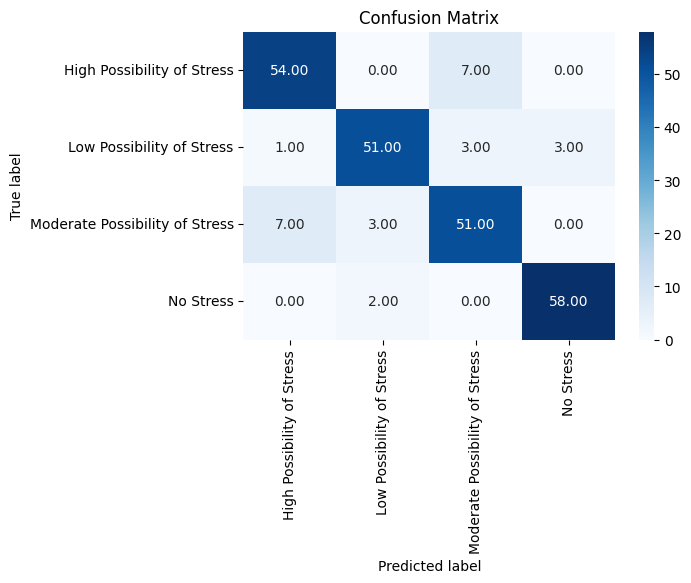

In [46]:
plot_confusion_matrix(y_test, y_pred, classes)

### KNN

In [47]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred_knn = knn_classifier.predict(X_test)

In [50]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn*100)


print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 87.91666666666667
                                precision    recall  f1-score   support

    High Possibility of Stress       0.93      0.90      0.92        61
     Low Possibility of Stress       0.85      0.79      0.82        58
Moderate Possibility of Stress       0.85      0.87      0.86        61
                     No Stress       0.88      0.95      0.91        60

                      accuracy                           0.88       240
                     macro avg       0.88      0.88      0.88       240
                  weighted avg       0.88      0.88      0.88       240



In [51]:
confusion_matrix(y_test,y_pred_knn)

array([[55,  0,  6,  0],
       [ 1, 46,  3,  8],
       [ 3,  5, 53,  0],
       [ 0,  3,  0, 57]])

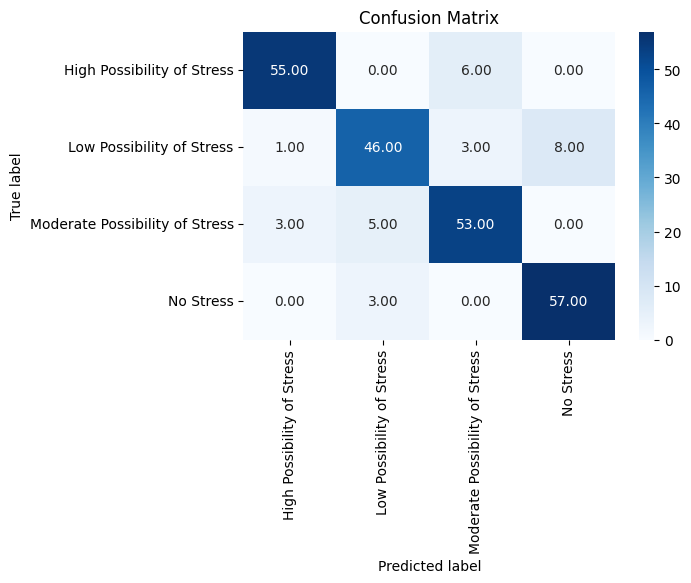

In [52]:
plot_confusion_matrix(y_test, y_pred_knn, classes)

## MLPClassifier

In [53]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [54]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [55]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [56]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_mlp))

MLPClassifier Accuracy: 85.83333333333333
                                precision    recall  f1-score   support

    High Possibility of Stress       0.88      0.80      0.84        61
     Low Possibility of Stress       0.87      0.83      0.85        58
Moderate Possibility of Stress       0.79      0.89      0.84        61
                     No Stress       0.90      0.92      0.91        60

                      accuracy                           0.86       240
                     macro avg       0.86      0.86      0.86       240
                  weighted avg       0.86      0.86      0.86       240



In [57]:
confusion_matrix(y_test,y_pred_mlp)

array([[49,  0, 12,  0],
       [ 2, 48,  2,  6],
       [ 5,  2, 54,  0],
       [ 0,  5,  0, 55]])

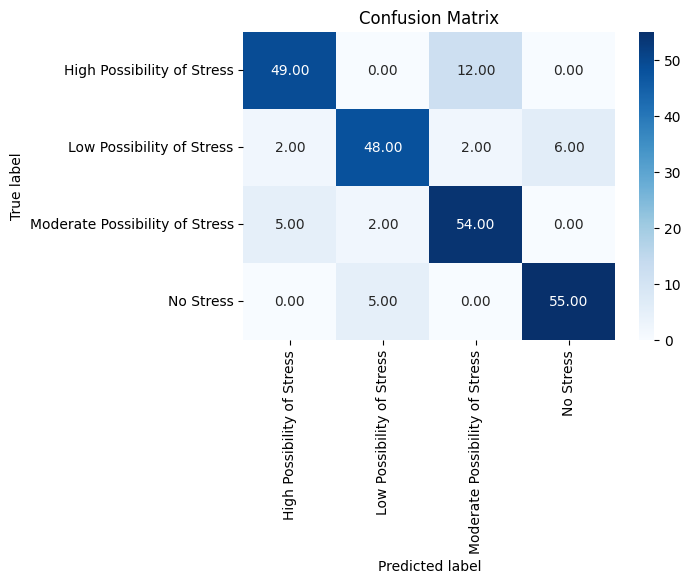

In [58]:
plot_confusion_matrix(y_test, y_pred_mlp, classes)

## Random Forest Classifier

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_rf = rf_classifier.predict(X_test)

In [62]:
accuracy_mlp = accuracy_score(y_test, y_pred_rf)
print("RF_Classifier Accuracy:", accuracy_mlp*100)

print(classification_report(y_test, y_pred_rf))

RF_Classifier Accuracy: 90.41666666666667
                                precision    recall  f1-score   support

    High Possibility of Stress       0.95      0.90      0.92        61
     Low Possibility of Stress       0.84      0.91      0.88        58
Moderate Possibility of Stress       0.86      0.93      0.90        61
                     No Stress       0.98      0.87      0.92        60

                      accuracy                           0.90       240
                     macro avg       0.91      0.90      0.90       240
                  weighted avg       0.91      0.90      0.90       240



In [63]:
confusion_matrix(y_test,y_pred_rf)

array([[55,  0,  6,  0],
       [ 1, 53,  3,  1],
       [ 2,  2, 57,  0],
       [ 0,  8,  0, 52]])

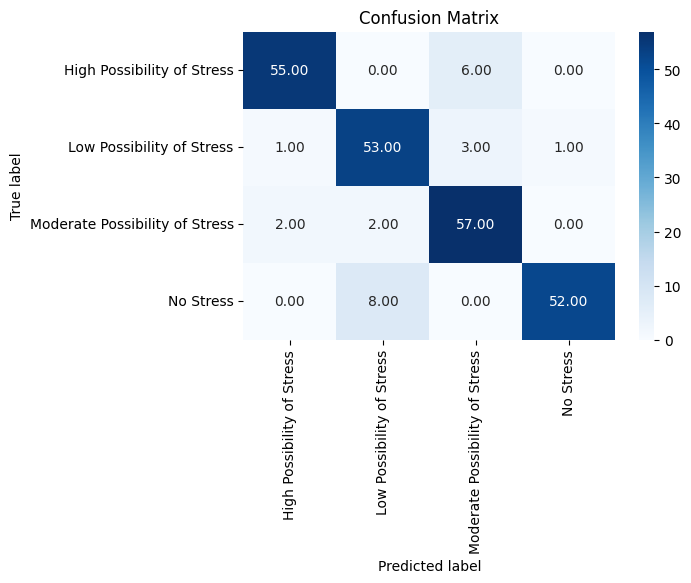

In [64]:
plot_confusion_matrix(y_test, y_pred_rf, classes)

## Save Best Model

In [65]:
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

## check predictions

In [82]:
from funtions import *

In [74]:
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total Score,Age,Partner Support,Marital Status,Sleep Quality,Fertility Treatment History,Diabetes Level,Stress Category
0,Definitely not so much now,Rather less than I used to,"No, never","Yes, very often","Yes, quite a lot","Yes, most of the time I haven't been able to c...","Yes, sometimes","No, not at all","No, never","Yes, quite often",17,26,Normal,Married,Moderate Quality,Moderate Intervention,Gestational Diabetes,Moderate Possibility of Stress
1,Definitely not so much now,Rather less than I used to,Not very often,"No, not at all","No, not much","Yes, sometimes I haven't been coping as well a...","Yes, sometimes","No, not at all","No, never",Never,9,35,Good,Married,High Quality,No Treatment Required,No Diabetes,No Stress
2,Not at all,Rather less than I used to,Not very often,"Yes, sometimes","No, not at all","No, most of the time I have coped quite well","Yes, most of the time","No, not at all","Yes, most of the time",Hardly ever,15,28,Normal,Married,Moderate Quality,Moderate Intervention,No Diabetes,Low Possibility of Stress
3,Definitely not so much now,Rather less than I used to,"Yes, some of the time","No, not at all","Yes, sometimes","Yes, most of the time I haven't been able to c...",Not very often,"Yes, most of the time",Only occasionally,Sometimes,17,25,Normal,Married,Moderate Quality,Moderate Intervention,Type 2 Diabetes,Moderate Possibility of Stress
4,Not at all,Definitely less than I used to,"Yes, most of the time","Yes, very often","No, not much","No, most of the time I have coped quite well",Not very often,"Yes, most of the time",Only occasionally,"Yes, quite often",21,20,Not Enough,Married,Poor Quality,Moderate Intervention,Type 1 Diabetes,High Possibility of Stress


In [75]:
df.drop("Stress Category", axis=1)[3:4]

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total Score,Age,Partner Support,Marital Status,Sleep Quality,Fertility Treatment History,Diabetes Level
3,Definitely not so much now,Rather less than I used to,"Yes, some of the time","No, not at all","Yes, sometimes","Yes, most of the time I haven't been able to c...",Not very often,"Yes, most of the time",Only occasionally,Sometimes,17,25,Normal,Married,Moderate Quality,Moderate Intervention,Type 2 Diabetes


In [77]:
test = preprocessor.transform(df.drop("Stress Category", axis=1)[3:4])

In [78]:
test_pred = rf_classifier.predict(test)
test_pred

array(['Moderate Possibility of Stress'], dtype=object)

In [83]:
get_prediction(df.drop("Stress Category", axis=1)[3:4])[0]

'Moderate Possibility of Stress'